# Simple box measured in dynamic conditions

<img src='images/rrtb.png' width=300 />

This exercise is similar to the previous exercise, with another test box. This box was installed outside and the sun has an important influence on its heat balance.

<img src='images/rrtb_data.png' width=600 />

The data is provided in the file `dynamic_data_2.xlsx`. The first tab contains training data, that you should use to fit a thermal model of the box. The columns are: date and time, ambient (outdoor) temperature T_a, heating power q, southern vertical solar irradiance I_sol and indoor temperature T_i. The second tab contains validation data, and is missing the indoor temperature.

### Question

Use the training data to train a predictive model of the box, and predict the indoor temperature during the test data (second tab of the excel file).

The model should include the influence of the solar irradiance. Here, a new parameter called solar aperture coefficient $gA$ (m$^2$) has been included:

$$ C\dfrac{\partial T}{\partial t} = \dfrac{1}{R} (T_a - T) + q +gA \; I_{sol}$$

The methodology is the same as in the exercise "Dynamic model 1"

### Example

Below is a python script that solves the exercise. You can solve it with Excel as well, but the curve fitting algorithms are more efficient here.

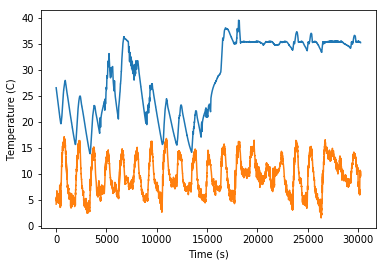

R: 0.24 K/W
C: 276615.23 J/K
gA: 0.16 m2


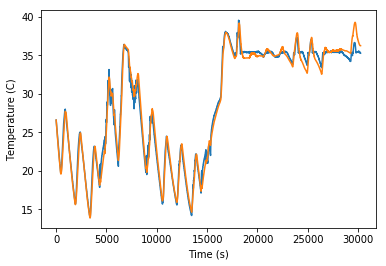

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data from file
data = pd.ExcelFile('data/dynamic_data_2.xlsx').parse('Training data')
Ti = data['T_i'].fillna(method='bfill')
Ta = data['T_a'].fillna(method='bfill')
P = data['q (W)'].fillna(method='bfill')
I_sol = data['I_sol (W/m2)'].fillna(method='bfill')
t_ = data['Time (DD/MM/AAAA h:mm)']

delta_t = 60
inputs = np.vstack((Ta, P, Isol))

# First plot of the data to make sure that nothing is missing
plt.figure()
plt.plot(Ti)
plt.plot(Ta)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.show()

# Function that will calculate the indoor temperature for a given value of R and C
def Ti_calc(inputs, R, C, gA):
    y = np.zeros_like(Ti)
    y[0] = Ti[0]
    for t in range(1,len(Ti)):
        y[t] = 1/(C/delta_t+1/R) * (C/delta_t*y[t-1] + 1/R*Ta[t] + P[t] + gA*I_sol[t])
    return y

#%% Optimisation

import scipy.optimize as so
# The curve_fit function will find the optimal value for the parameters R and C
p_opt, p_cov = so.curve_fit(f=Ti_calc, xdata=inputs, ydata=Ti, p0=(0.5, 100000, 0.5))
R_opt = p_opt[0]
C_opt = p_opt[1]
gA_opt = p_opt[2]

print('R: %.2f K/W' % R_opt)
print('C: %.2f J/K' % C_opt)
print('gA: %.2f m2' % gA_opt)

#%% Plot the results to see if the calculated temperature fits well with measurements

plt.figure()
plt.plot(Ti)
plt.plot(Ti_calc(inputs, R_opt, C_opt, gA_opt))
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.show()